<a href="https://colab.research.google.com/github/chiaralos/Evaluacion_Regresion_Linear/blob/main/Implementaci%C3%B3n_Python/Examen_Final-Chiara_Valenzuela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png)
<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b>Tema:</b>Parcial Final</i>
<br>
<i><b>Asignatura:</b> Introducción a HPC</i>
<br>
<i><b>Docente:</b> John  Corredor, Phd</i>
<br>
<i><b>Estudiante:</b> Chiara Vivian Valenzuela Losada</i>
<br>
<i><b>Cédula de Ciudadanía:</b> 1077843328</i>
<br>
<i>23/11/22</i>
<br>
</FONT>
</p>

# **$\textrm{Importaciones y carga de dataset}$**

In [ ]:
#Se importan las bibliotecas requeridas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd                         
import numpy as np                          
import matplotlib.pyplot as plt             
import matplotlib.ticker as ticker
import seaborn as sns                       
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [ ]:
#Se carga el dataset en un objeto pandas "Dataframe"
url = "https://raw.githubusercontent.com/chiaralos/Evaluacion_Regresion_Linear/main/Dataset/cubic_zirconia.csv"
df = pd.read_csv(url)

#**$$\textrm{Análisis Exploratorio de Datos (EDA)}$$**

## Descripción de Valores:
    Carat: Peso en quilates de la zirconia cúbica.
    Cut: Describe la calidad del corte de la zirconia cúbica. La calidad es creciente en el orden Regular, Bueno, Muy Bueno, Premium, Ideal.
    Color: Color de la zirconia cúbica, siendo D el mejor y J el peor.
    Clarity: La claridad de la zirconia cúbica se refiere a la ausencia de inclusiones y manchas. (En orden de mejor a peor, FL = impecable, I3= nivel 3 de inclusiones) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
    Depth: La altura de una zirconia cúbica, medida desde el culet hasta la mesa, dividida por su diámetro medio de faja.
    Table:La Anchura de la Tabla de la zirconia cúbica expresada como un Porcentaje de su Diámetro Medio.
    Price: El Precio de la zirconia cúbica.
    X: La longitud de la zirconia cúbica en mm.
    Y:La anchura de la zirconia cúbica en mm.
    Z:Altura de la zirconia cúbica en mm.
    

##$\textrm{Resumen estadístico}$

In [ ]:
#Se requiere visualizar los 5 primeros elementos del dataframe
df.head()

In [ ]:
#Se elimina la primera columna dado que no aporta información
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
#Se requiere un resumen estadístico de las variables numéricas del df
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

In [ ]:
#Se lista la cantidad de posiciones nulas por columna
df.isnull().sum()

In [ ]:
#Se eliminan los regstros que contienen posiciones nulas
df = df.dropna()
#Se lista la cantidad de posiciones nulas por columna
df.isnull().sum()

In [ ]:
#Se eliminan los duplicados del dataframe
print(f'Antes de remover duplicados{df.shape}')
df.drop_duplicates(inplace=True)
print(f'Después de remover duplicados{df.shape}')

In [ ]:
# Se requiere visualizar la correlación entre las variables
# La correlación representa la afinidad o relación entre las variables
# Sí la correlación es cercana a 1: La relación es directamente proporcional
# Sí la correlación es cercana a -1: La relación es inversamente proporcional
# Sí la correlación es cercana a 0: La relación no existe
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), cmap='Wistia', annot= True)
plt.title('Gráfica de calor: Correlación de pearson de las variables numéricas')
plt.show()

## **$\textrm{Análisis univariante}$**

In [ ]:
# Se vislualizan la cantidad de valores contenidos en los datos categóricos
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('Tipos de claridad')
plt.ylabel('Cantidad')


plt.suptitle('Distribución de Corte, Color y Claridad de las Gemas')
plt.show()

In [ ]:
# Se muestran las distribuciones de la profundidad, el peso en quilates y el precio
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')

plt.subplot(132)
sns.distplot(df['carat'], color='red')

plt.subplot(133)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribución de profundidad, peso en quilates, y precio')
plt.show()

In [ ]:
# Se muestra la distribución de los datos que refieren a la longitud de la zirconia cúbica
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='black')

plt.suptitle('Distribución de la longitud de la zirconia cúbica (x,y,z)')
plt.show()

## **$\textrm{Análisis bivariante}$**

In [ ]:
# Se requiere graficar la relación entre los quilates y el precio de la gema.
sns.scatterplot(df['carat'], df['price'])
plt.title('peso en quilates vs precio')
plt.show()

In [ ]:
# Se requiere graficar como afecta la longitud al precio de la gema
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(df['x'], df['price'], color='orange')

plt.subplot(132)
sns.scatterplot(df['y'], df['price'], color='orange')

plt.subplot(133)
sns.scatterplot(df['z'], df['price'], color='orange')

plt.suptitle('Precio y longitud de la gema')
plt.show()

In [ ]:
# En relación a las graficas anteriores se hace necesario eliminar todos aquellos 0 y reemplazar los valores atípicos por valores frecuentes
df=df[~((df['x']==0)|(df['y']==0)|(df['z']==0))]
df['y'].values[df['y'].values>50]=df['y'].mode()[0]
df['z'].values[df['z'].values>30]=df['z'].mode()[0]

In [ ]:
plt.subplot(131)
plt.title("Corte vs Precio")
sns.boxplot(df['cut'], df['price'])

plt.subplot(132)
plt.title("Color vs Precio")
sns.boxplot(df['color'], df['price'])

plt.subplot(133)
plt.title("Claridad vs Precio")
sns.boxplot(df['clarity'], df['price'])



# **$$\textrm{Preprocesado de datos}$$**

In [ ]:
#Se requiere reemplazar todos aquellos datos categóricos (cut, clarity and color) por datos numéricos.
df['cut']=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))
colors_dummies=pd.get_dummies(df['color'], drop_first=True)
df['clarity']=df['clarity'].replace(('IF', 'VVS1', 'VVS2', 'VS1', 'VS2','SI1', 'SI2', 'I1'), (1,2,3,4,5,6,7,8))
df=pd.concat([df, colors_dummies], axis=1)
df.drop(['color'], axis=1, inplace=True)

In [ ]:
#Reorganización de columnas
df = df.reindex(columns=['carat','cut','clarity','table','x','y','z','E','F','G','H','I','J','price'])
df.head()

In [ ]:
#Se muestra la matriz de correlación de pearson de todas las columnas en el dataframe
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [ ]:
# Se exporta el csv a usar en la regresión lineal en c++
# Guarda datos en CSV:
df.to_csv('cubic_zirconia_final.csv', header=True, index=False)

# **$$\textrm{Modelo LR con Scikit-Learn}$$**

In [ ]:
# Se importa el dataframe con los cambios hecho anteriormente
df_final = pd.read_csv('https://raw.githubusercontent.com/chiaralos/Evaluacion_Regresion_Linear/main/Dataset/cubic_zirconia_final.csv')

In [ ]:
#Se normalizan los datos usando Z-Score
normalizador = StandardScaler().fit(df_final)
norm = normalizador.transform(df_final)
df_norm = pd.DataFrame(np.asmatrix(norm))
#Se muestran las 5 primeras filas de datos normalizados
df_norm.head()

In [ ]:
# Reparto de datos en train y test
# ==============================================================================
X=df_final.drop('price', axis=1)
y=df_final.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print("Partición de entrenamiento")
print("-----------------------")
print(X_train.describe(), "\n")
print(y_train.describe())

print("\n Partición de test")
print("-----------------------")
print(X_test.describe(), "\n")
print(y_test.describe())

In [ ]:
#Definimos el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()
#Entrenamos el modelo
lr_multiple.fit(X_train, y_train)
#Realizamos una predicción
Y_pred= lr_multiple.predict(X_test)

In [ ]:
#Se muestran los valores hallados en la regresión linear
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE \n')
print('Valor de las pendientes o coeficientes "m":\n', lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":\n', lr_multiple.intercept_)

In [ ]:
#Se visualizan los valores predichos por el modelo en relación a los valores reales
x = y_test 
y = Y_pred
plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("Y real")
plt.ylabel("Y estimada")
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

#**$$\textrm{Métrica de rendimiento}$$**



## $\textrm{Métrica R²:}$
$\textrm{Esta métrica es el coeficiente de determinación y representa la proporción de la varianza de y que es explicada}\\ \textrm{por las variables independientes del modelo. Esta métrica es dependiente de los datos y no puede ser utilizada} \\ \textrm{para compara modelos usados sobre diferentes datasets. Su fórmula es:}$

$$R²(y_i,\hat{y}_i)=1-\frac{\sum (y_i-\hat{y}_i)^{2}}{\sum (y_i-\bar{y})^{2}}$$

$\textrm{Es de resaltar que el mejor resultado posible es un 1.0}$

In [ ]:
# MÉTRICA
print('R2 score: %.2f' % r2_score(y_test, Y_pred))

# **$$\textrm{Comparativas con capturas entre SK-L/C++}$$**

##$\textrm{Promedios por columna: }$

###$\textrm{Python: }$
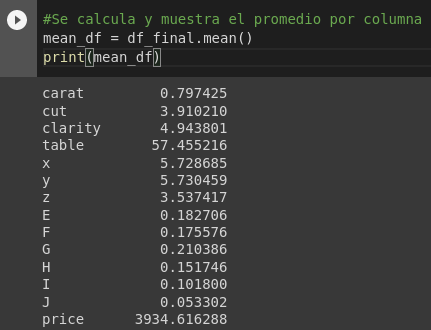

###$\textrm{C++: }$
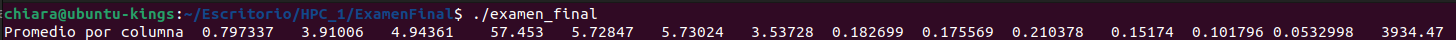

###$\textrm{Se puede afirmar que los promedios por columna no tienen discrepancias importantes.}$

In [ ]:
#Se calcula y muestra el promedio por columna
mean_df = df_final.mean()
print(mean_df)

##$\textrm{Desviación estándar por columna: }$

###$\textrm{Python: }$
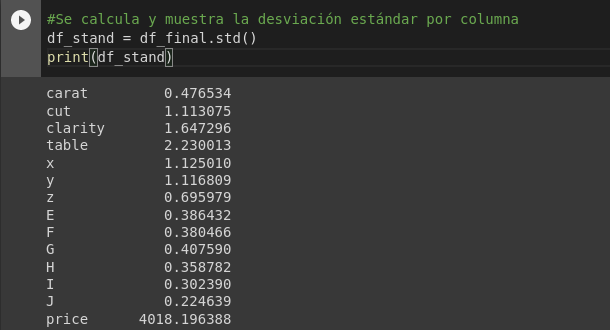

###$\textrm{C++: }$
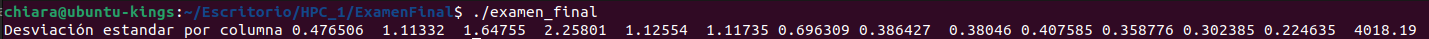

###$\textrm{En vista a lo anteror, es posible afirmar que las desviaciones estándar por columna coinciden casi en su totalidad.}$

In [ ]:
#Se calcula y muestra la desviación estándar por columna
df_stand = df_final.std()
print(df_stand)

##$\textrm{Métrica R²: }$

###$\textrm{Python: }$
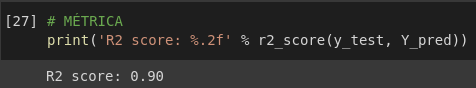
###$\textrm{C++: }$
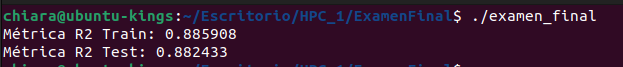

###$\textrm{En conlusión el modelo generado por python es un 0.02 más acertado que el generado en C++ }$

# **$$\textrm{Conclusiones}$$**




## $\textrm{Conclusiones análitica de datos}$
* $\textrm{La data usada corresponde a los datos de gemas.}$
* $\textrm{Se presenta una descripción del contenido inicial del dataframe.}$
* $\textrm{Se importaron las bibliotecas requeridas, usando Pandas, Seaborn, Numpy, Matplotlib.pyplot y Sklearn.}$
* $\textrm{La data presenta datos numéricos y datos categóricos.}$
* $\textrm{Se presentan visulaizaciones univariante y bivariante de los datos categóricos y numéricos del dataframe}$
* $\textrm{Se listan y eliminan los registros que presentan datos nulos, desaparecidos o duplicados.}$
* $\textrm{Se presenta una visualización de correlación de pearson de las variables.}$
* $\textrm{Se presenta un resumen estadístico de las variables numéricas del dataframe.}$
* $\textrm{Se remplazan las variables categóricas por datos numéricos.}$
* $\textrm{Se exportan los datos con todas la modificaciones para que puedan ser usados en la regresión lineal en C++.}$
* $\textrm{Se concluye finalmente, que de forma satisfactoria se han pre procesado los datos.}$


## $\textrm{Conclusiones sobre relación entre variables}$
* $\textrm{Es posible decir que si los quilates de la gema incrementan el precio también por lo que poseen una relación directamente} \\ \textrm{proporcional.}$ 
* $\textrm{Es posible decir que si el tamaño de la gema aumenta el precio incrementa.}$ 
* $\textrm{La mayoría de las gemas vendidas están en el rango de 0,20 - 0,55 quilates.}$ 
* $\textrm{Las gemas con quilates mayores a 1,27 se venden menos}$ 
* $\textrm{La mayoría de los diamantes que se venden pertenecen a la categoría de talla "ideal" y el rango de "quilates más bajo" se} \\ \textrm{sitúa entre 0,2 y 0,55 quilates.}$ 
* $\textrm{Las gemas de color G son los más vendidos.}$ 

## $\textrm{Conclusiones Generales}$

$\textrm{El desarrollo de este trabajo es de utilidad para entender a profundidad los modelos de regresion lineal simple y regresión lineal } \\ \textrm{múltiple, así como evidenciar en que casos es mas factible o beneficioso que otros modelos de regresión, en este ejercicio particular} \\ \textrm{se concluye que:}$ \\

* $\textrm{La visualización de datos y el uso de herramientas estadísticas es de vital importancia previamente a la construcción del modelo. }$ \\
* $\textrm{En las aplicaciones de la regresión es posible notar que la métrica R² en python es un 0.02 mejor que en C++.}$
* $\textrm{Cabe resaltar, que los promedios y las desviaciones estándar no presentan variaciones importantes al comparar} \\ \textrm{las implementaciones hechas en C++ y Python.}$

# **$$\textrm{Referencias}$$**




* $\textrm{Gonzalez, L. (2018, diciembre 14). Regresión Lineal - Práctica con Python - Aprende IA.}$
https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/

* $\textrm{Machine Learning con Python y Scikitlearn. (s/f). Cienciadedatos.net.}$ 
https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html

* $\textrm{Anónimos. (2018, mayo 12). Ejemplo Regresión Lineal Python. Aprendemachinelearning.com; Aprende Machine Learning.}$ 
https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

* $\textrm{Github.io. (s/f). Métricas básicas de evaluación para modelos de regresión — 8:21 min — documentación de Cursos de Analítica y Machine Learning -}$ https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/2-14_metricas_para_regresion.html
